6.4. Multiple Input and Multiple Output Channels
https://d2l.ai/chapter_convolutional-neural-networks/channels.html

In [2]:
!pip install d2l==0.17.2

Implement cross-correlation operations with multiple input channels ourselves. Notice that all we are doing is performing one cross-correlation operation per channel and then adding up the results.

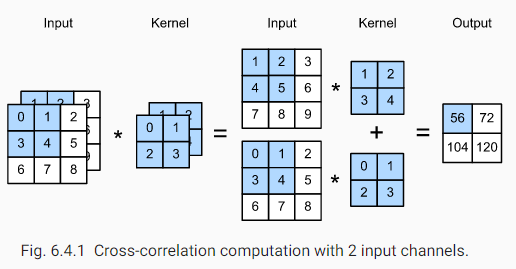

In [3]:
import tensorflow as tf
from d2l import tensorflow as d2l


def corr2d_multi_in(X, K):
    # First, iterate through the 0th dimension (channel dimension) of `X` and
    # `K`. Then, add them together
    return tf.reduce_sum([d2l.corr2d(x, k) for x, k in zip(X, K)], axis=0)

We can construct the input tensor X and the kernel tensor K corresponding to the values in Fig. 6.4.1 to validate the output of the cross-correlation operation.

In [4]:
X = tf.constant([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = tf.constant([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 56.,  72.],
       [104., 120.]], dtype=float32)>

##Multiple Output Channels

We implement a cross-correlation function to calculate the output of multiple channels as shown below.

In [5]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of `K`, and each time, perform
    # cross-correlation operations with input `X`. All of the results are
    # stacked together
    return tf.stack([corr2d_multi_in(X, k) for k in K], 0)

We construct a convolution kernel with 3 output channels by concatenating the kernel tensor K with K+1 (plus one for each element in K) and K+2.

In [6]:
K = tf.stack((K, K + 1, K + 2), 0)
K.shape

TensorShape([3, 2, 2, 2])

Below, we perform cross-correlation operations on the input tensor X with the kernel tensor K. Now the output contains 3 channels. 

In [7]:
corr2d_multi_in_out(X, K)

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[ 56.,  72.],
        [104., 120.]],

       [[ 76., 100.],
        [148., 172.]],

       [[ 96., 128.],
        [192., 224.]]], dtype=float32)>

##1×1  Convolutional Layer


Let us check whether this works in practice: we implement a  1×1  convolution using a fully-connected layer. The only thing is that we need to make some adjustments to the data shape before and after the matrix multiplication.

In [8]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = tf.reshape(X, (c_i, h * w))
    K = tf.reshape(K, (c_o, c_i))
    # Matrix multiplication in the fully-connected layer
    Y = tf.matmul(K, X)
    return tf.reshape(Y, (c_o, h, w))

When performing  1×1  convolution, the above function is equivalent to the previously implemented cross-correlation function corr2d_multi_in_out. Let us check this with some sample data.

In [9]:
X = tf.random.normal((3, 3, 3), 0, 1)
K = tf.random.normal((2, 3, 1, 1), 0, 1)

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(tf.reduce_sum(tf.abs(Y1 - Y2))) < 1e-6

##Summary
* Multiple channels can be used to extend the model parameters of the convolutional layer.

* The  1×1  convolutional layer is equivalent to the fully-connected layer, when applied on a per pixel basis.

* The  1×1  convolutional layer is typically used to adjust the number of channels between network layers and to control model complexity.